# 출처

딥러닝 파이토치 교과서 - 더북
https://thebook.io/080289/ch07/01/

직접 구현 RNN
http://incredible.ai/tensorflow/2017/09/16/Recurrent-Neural-Network/

시계열 데이터 만들고 구현 RNN
https://codetorial.net/tensorflow/time_series_forecasting/index.html

주가 예측 텐서플로우 모델
https://teddylee777.github.io/tensorflow/lstm-stock-forecast/

주가 예측 파이토치 모델
https://data-science-hi.tistory.com/190

텍스트 분석 모델
https://wikidocs.net/60691

# 시계열 분석 [이론과 예제]

##시계열

- 시간에 따라 변하는 데이터
- 주가/환율 변동, 기온/습도 변화
- 추세 파악, 향후 전망 예측

형태
- 데이터 변동 유형에 따라
  1. 불규칙 변동 - 전쟁,홍수,화재,지진,파업..
  2. 추세 변동 - 국내총생산, 인구증가율
  3. 순환 변동 - 경기 변동 (주기적)
  4. 계절 변동 - 계절적 영향 + 사회적 관습으로 주기적으로 순환하며 변동
- 규칙에 따라
  1. 규칙적 시계열
    - 트렌드, 분산이 불변
  2. 불규칙적 시계열
    - 트렌드, 분산이 변화

독립변수
- 시간
- 일반적 ML 모델들과 다름

    

##AR,MA,ARMA,ARIMA 모델

####AR(AutoRegressive) 모델


- 이전 관측값이 이후 관측값에 영향을 줌, 자기 회귀 모델
- 수식

  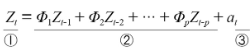
    
    ① 시계열 데이터의 현재 시점
    
    ② 모수(Φ)(과거가 현재에 미치는 영향) * 과거 시점

    ③ 오차 항을 의미, 백색 잡음

    즉, p시점을 기준으로 이전 데이터에 의해 현재 시점 데이터가 영향 받음

####MA(Moving Average) 모델


- 트렌드(평균 혹은 y)가 변화하는 상황에서의 회귀 모델

- 이동 평균 모델 : 시계열을 따라 윈도우 크기만큼 슬라이딩 됨

- 수식
  
  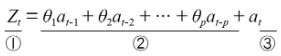
  
  ① 시계열 데이터 현재 시점

  ② 매개변수(θ) * 과거 시점의 오차

  ③ 오차 항

  즉, 이전 데이터의 오차에서 현재 데이터의 오차 추론 (AR모델처럼 이전 데이터의 '상태'가 아닌 '오차')


####ARMA 모델(AutoRegressive Moving Average)


- AR + MA 모델, AR&MR 두 관점에서 과저 데이터 사용

- 자기 회귀 이동 평균 모델

- 수식

  image.png


####ARIMA 모델(AutoRegressive Integrated Moving Average)


- 자기 회귀 + 이동 평균 둘 다 고려

- ARMA와 달리 과거 데이터의 선형 관계 + 추세까지 고려

- 자기 회귀 누적 이동 평균 모델

- [Python code]
  1. ARIMA(p,d,q) 함수
    
    p : 자기 회귀 차수
    
    d : 차분 차수
    
    q : 이동 평균 차수

  2. fit() 메서드로 모델 훈련

  3. predict() 메서드로 미래 추세 및 동향 예측

  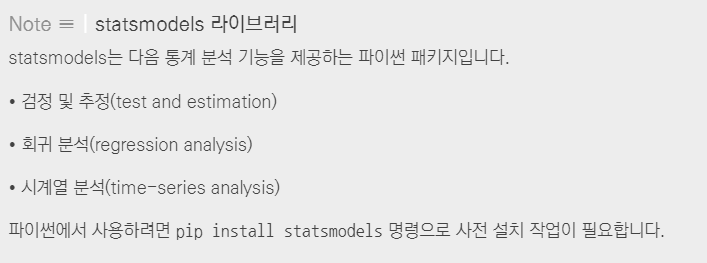

####ARIMA model [CODE]

##### dataset & 시각화

- 결과값이 치우쳐 있음을 확인
  - 오류 평균(mean) 값이 0이 아님

In [ ]:
from pandas import read_csv 
# 파이썬 판다스 라이브러리의 read_csv() 메서드를 사용해서 외부 TEXT 파일, CSV 파일을 불러와서 DataFrame으로 저장
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

def parser(x): # 시간을 표현하는 함수 정의
    return datetime.strptime('199'+x, '%Y-%m') 
    # strptime()은 날짜와 시간 정보를 문자열로 바꾸어 주는 메서드

series = read_csv('/content/drive/MyDrive/ROBOTICS/RNN/dataset/sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# 자전거 매출에 대한 CSV 데이터 호출
model = ARIMA(series, order=(5,1,0)) 
# ARIMA( ) 함수 호출
model_fit = model.fit(disp=0) 
# 모형을 적용할 때 많은 디버그 정보가 제공되는데 disp 인수를 0으로 설정하여 이 기능을 비활성화
print(model_fit.summary())
# 모델에 대한 정보 표시
residuals = DataFrame(model_fit.resid)
# DataFrame에 모델에 대한 오차 정보를 residuals라는 변수에 저장
residuals.plot()
# residuals 정보를 시각적으로 표현
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

####ARIMA()함수로 예측 진행

- 실제 데이터 : 빨간 그래프

- 모형 실행 결과 : 파란 그래프

- 우상향 그래프 결과
  - 자전거 판매가 향후에도 증가할 것임

In [ ]:
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('/content/drive/MyDrive/ROBOTICS/RNN/dataset/sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)] 
# train과 test로 데이터셋 분리
history = [x for x in train]
predictions = list()
for t in range(len(test)):
  # test 데이터셋의 길이(13)만큼 반복하여 수행
    model = ARIMA(history, order=(5,1,0))
    # ARIMA() 함수 호출
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    # forecast() 메서드를 사용하여 예측 수행
    yhat = output[0] 
    # 모델 출력 결과를 yhat에 저장
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs)) 
    # 모델 실행 결과를 predicted로 출력하고, test로 분리해 둔 데이터를 expected로 사용하여 출력
error = mean_squared_error(test, predictions) 
# 손실 함수로 평균 제곱 오차 사용
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## RNN (Recurrent Neural Network)

- 시간적으로 연속성이 있는 데이터 처리 인공신경망

- 이전 은닉층이 현재 은닉층의 입력이 됨
  '''반복되는 순환 구조'''

- 기억을 갖는 네트워크 (새로운 입력에 대해 기억을 수정해나감 ㅡ> 최종적으로 모든 입력 전체를 요약한 정보가 기억이 됨)

  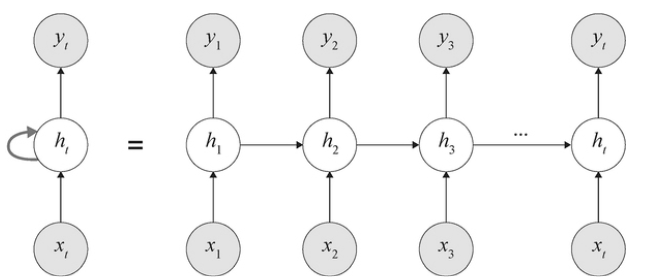
  1. x1(첫번째 입력)이 들어오고, h1(첫번째 기억)이 만들어짐
  2. x2(두번째 입력)이 들어오고, h1(기존 기억)과 새로운 입력을 참고해, h2(새로운 기억)이 만들어짐
  

### RNN 입력과 출력에 따른 유형

1. 일대일
  
  그냥 순방향 네트워크임
2. 일대다
  
  input 1개, output N개 ㅡ> 이미지 입력해 이미지에 대한 설명을 문장으로 출력

  이미지 캡션 (image captioning)
3. 다대일

  input N개, output 1개 ㅡ> 문장 입력해 긍정/부정 출력

  감성 분석기

  [Pytorch Code]
        self.em = nn.Embedding(len(TEXT.vocab.stoi), embeding_dim) ------ 임베딩 처리
        self.rnn = nn.RNNCell(input_dim, hidden_size) ------ RNN 적용
        self.fc1 = nn.Linear(hidden_size, 256) ------ 완전연결층
        self.fc2 = nn.Linear(256, 3) ------ 출력층
    
  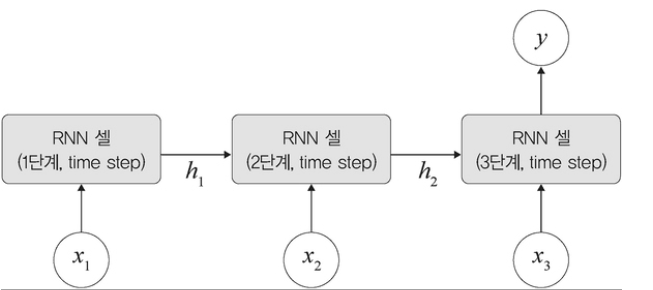

  - 입 출력 사이에는 하나의 RNN 셀만 존재

  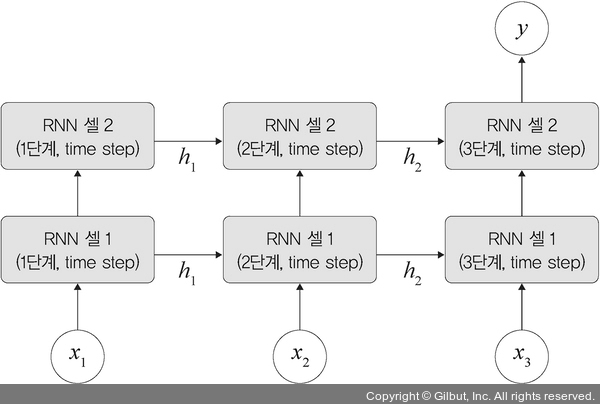

  - 적층된 다대일 모델

4. 다대다

  input,output N개

  언어 자동 번역기

  [Pytorch Code]

          Seq2Seq(
          (encoder): Encoder(
            (embedding): Embedding(7855, 256)
            (rnn): LSTM(256, 512, num_layers=2, dropout=0.5)
            (dropout): Dropout(p=0.5, inplace=False)
          )
          (decoder): Decoder(
            (embedding): Embedding(5893, 256)
            (rnn): LSTM(256, 512, num_layers=2, dropout=0.5)
            (fc_out): Linear(in_features=512, out_features=5893, bias=True)
            (dropout): Dropout(p=0.5, inplace=False)
          )
        )

  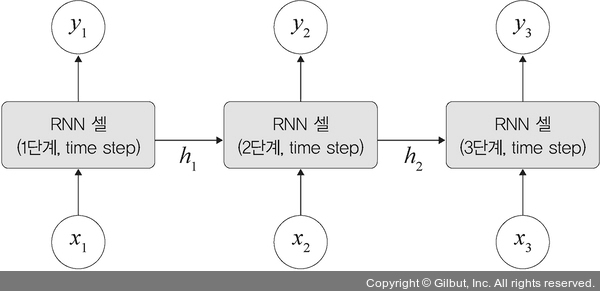

5. 동기화 다대다

  input,output N개

  언어 모델 : 문장에서 다음에 나올 언어 에측

  프레임 수준의 비디오 분류 모델

- 유형 시각화

  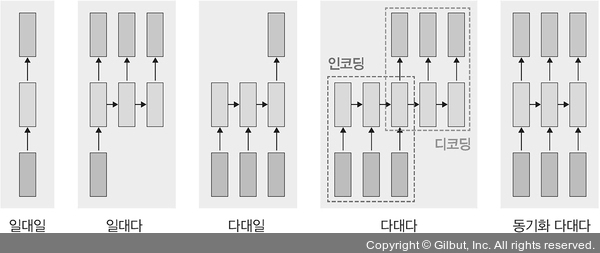

### RNN 계층(Layer) & 셀(cell)

- 계층 vs 셀
  - 계층 : 입력된 배치 순서대로 모두 처리
  - 셀 : 오직 하나의 단계만 처리

    for loop 구문

  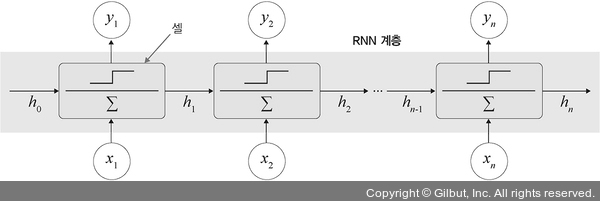

  - 계층은 셀을 래핑하여 동일한 셀을 여러 단계에 적용 (그림처럼 1 ~ N 단계)
  - 셀은 계산에 사용되는 구성 요소이며

    단일 입력 + 과거 상태 ㅡ> 출력 + 새로운 상태를 생성

- 셀 유형 (Pytorch)

  1. nn.RNNCell ㅡ simpleRNN 계층에 대응되는 셀
  2. nn.GRUCell ㅡ GRU 계층에 대응되는 셀
  3. nn.LSTMCell ㅡ LSTM 계층에 대응되는 셀

  


### RNN 활용 분야



- 자연어 처리
  - 음성 인식, 단어 의미 판단 및 대화
- 시계열 데이터 처리
  - 손글씨, 센서 데이터 등

### RNN 구조

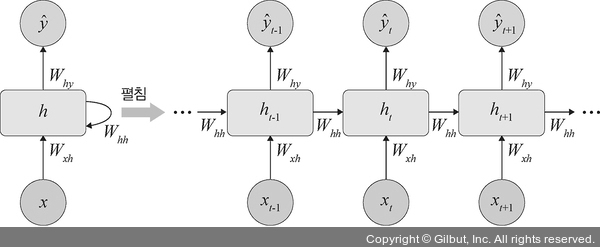

- RNN의 가중치는 3개

  - Wxh : input ㅡ> hidden
  
  - Whh : hidden(t시점) ㅡ> hidden(t+1시점)
  
  - Why : hidden ㅡ> output

- 가중치 공유
  - 모든 시점에서 동일

- RNN 계산 (t시점)

  1. **은닉층 계산**

    Activation Function : tanh

    은닉층 = (이전 은닉층 가중치)x(은닉층 가중치)
    
    입력층 = (현재 은닉층 가중치)x(현재 입력)
    
    y = 은닉층 x 입력층

    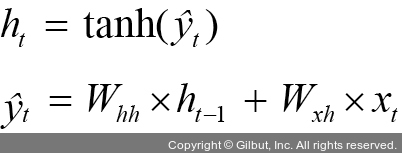
    
  2. **출력층**

    심층 신경망 계산 방법과 동일

    Activation Function : softmax

    y = softmax(출력층 가중치 x 현재 은닉층)

    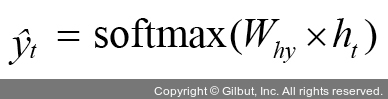

  3. **오차(E)**

    각 단계(t)마다 오차 측정

    MSE 이용

    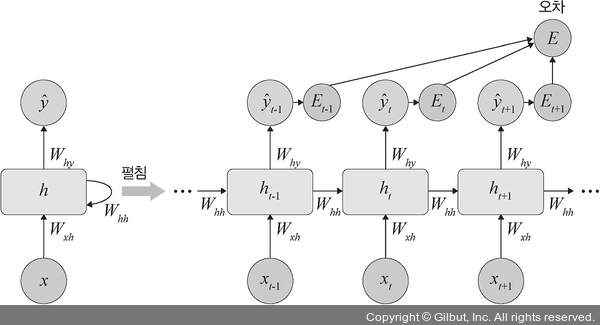

  4. **역전파**

    BPTT (BackPropagation Through Time) : 각 단계(t)마다 오차 측정, 이전 단계로 전달

      3단계에서 구한 오차로 Wxh,Whh,Why,bias 업데이트

      vanishing gradient 문제 발생함

    truncated BPTT : 위 문제 해결, 오차를 몇 단계까지만 전파

    모든 단계마다 처음부터 끝까지 역전파

    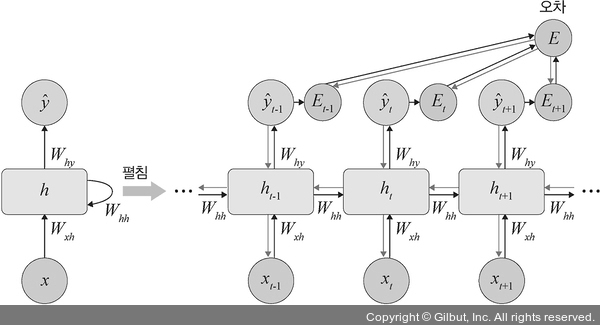
  

### RNN 코드 구현 [IMDB dataset]

정확도 30%

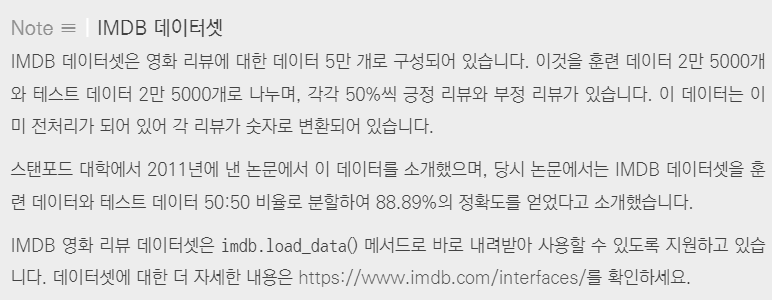

####import

In [ ]:
!pip install -U torchtext==0.6.0

In [ ]:
import torch
import torchtext
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import time
from torchtext import data

#### dataset

In [ ]:
start = time.time()
TEXT = data.Field(lower=True, fix_length=200, batch_first=False) 
# Field : 데이터 전처리 함수
#   lower : 대문자 ㅡ> 소문자 (기본값 false)
#   fix_length : 고정된 길이의 데이터 얻기, 200보다 짧으면 padding작업으로 200맞춰줌
#   batch_first : 입력되는 텐서의 첫번째 차원 값이 배치 크기가 되도록함 (기본값 false)
#                 True로 설정 ㅡ> [batch_size(배치크기),seq_len(시퀸스길이),hidden_size(은닉층뉴런수)]
LABEL = data.Field(sequential=False) 
# label에 대한 전처리
#   squential : 데이터 순서 여부 (기본값 false)

In [ ]:
# IMDB dataset
#   영화 리뷰 5만 건 이상의 데이터셋
#   긍정은 2, 부정은 1로 라벨링 됨
from torchtext import datasets
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)



In [ ]:
print(vars(train_data.examples[0]))
# 데이터셋의 내용을 보고자 할 때는 examples를 사용

#### 전처리

In [ ]:
import string

for example in train_data.examples:
    text = [x.lower() for x in vars(example)['text']] 
    # 소문자로 변경
    text = [x.replace("<br","") for x in text] 
    #“<br”을 “ ”(공백)으로 변경
    text = [''.join(c for c in s if c not in string.punctuation) for s in text]
    # 구두점 제거
    text = [s for s in text if s]
    # 공백 제거
    vars(example)['text'] = text

#### 훈련 & 검증 셋 분리

In [ ]:
import random
train_data, valid_data = train_data.split(random_state=random.seed(0), split_ratio=0.8) 

In [ ]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

####단어 집합 만들기

In [ ]:
TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
# max_size : 단어 집합 크기, 단어 집합에 포함되는 어휘 수
# min_freq : 특정 단어의 최소 등장 횟수, 최소 10번이상 등장한 단어만 넣음
# vectors : 임베딩 벡터 지정, 워드 임베딩의 결과로 나온 벡터
LABEL.build_vocab(train_data)

print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")
print(f"Unique tokens in LABEL vocabulary: {len(LABEL.vocab)}")

In [ ]:
print(LABEL.vocab.stoi)
# 긍정 pos
# 부정 neg
# unk ㅡ> 사전에 없는 단어

#### 데이터셋 메모리로 가져오기

유닛의 의미

  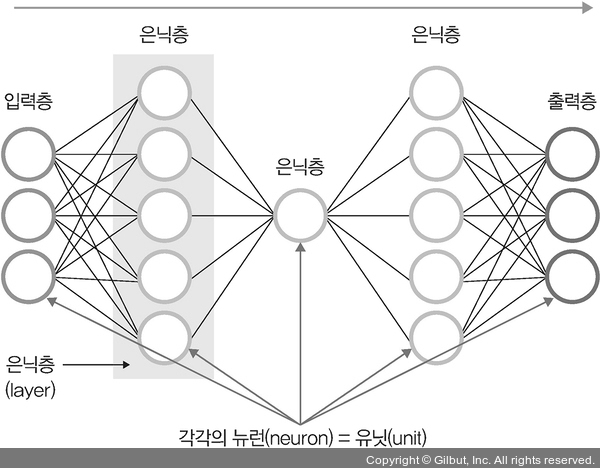

In [ ]:
BATCH_SIZE = 64
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

embeding_dim = 100 
# 각 단어를 100차원으로 조정(임베팅 계층을 통과한 후 각 벡터의 크기)
hidden_size = 300 
# 은닉층 유닛 개수

train_iterator, valid_iterator, test_iterator = torchtext.data.BucketIterator.splits(
    (train_data, valid_data, test_data),
    batch_size=BATCH_SIZE, # 한번에 가져올 데이터 크기
    device=device) # 장치 사용 여부
# BucketIterator로 데이터 길이 조정 가능
#   비슷한 길이의 데이터를 한 배치에 할당하여 패딩을 최소화

#### cell 구현 & 워드 임베딩

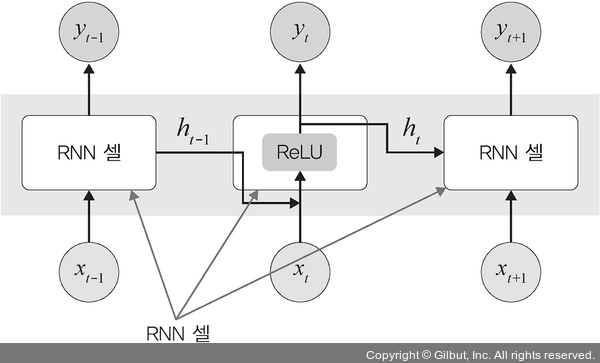

In [ ]:
class RNNCell_Encoder(nn.Module):
    def __init__(self, input_dim, hidden_size):
        super(RNNCell_Encoder, self).__init__()
        self.rnn = nn.RNNCell(input_dim, hidden_size)
        # input_dim : 훈련 데이터셋 특성 개수(배치,입력 데이터 칼럼 수)로 구성
        # hidden_size : 은닉층 뉴런 수(배치,은닉층 뉴런 수)로 구성

    def forward(self, inputs):
      # inputs는 입력 시퀀스로 (시퀀스 길이, 배치, 임베딩(seq,batch, embedding))의 형태를 갖습니다.
        bz = inputs.shape[1] 
        # 배치를 가져옴
        ht = torch.zeros((bz, hidden_size)).to(device)
        # 배치와 은닉층 뉴런의 크기를 0으로 초기화
        for word in inputs:
            ht = self.rnn(word, ht) 
            # 재귀적으로 발생하는 상태 값 처리
            # ht : 현재 상태
            # word : 현재의 입력 벡터(Xt)
            # (괄호)ht : 이전 상태를 의미(ht-1)
        return ht

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.em = nn.Embedding(len(TEXT.vocab.stoi), embeding_dim) 
        # 임베딩 처리
        # TEXT.vocab.stoi : 임베딩 할 단어 수
        # embeding_dim : 임베딩 할 백터 차원 수
        self.rnn = RNNCell_Encoder(embeding_dim, hidden_size)
        self.fc1 = nn.Linear(hidden_size, 256)
        self.fc2 = nn.Linear(256, 3)

    def forward(self, x):
        x = self.em(x)
        x = self.rnn(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

#### Optimiser & Loss Function

In [ ]:
model = Net()
model.to(device)

loss_fn = nn.CrossEntropyLoss()
# 다중 분류 loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

#### Model Train Function 

In [ ]:
def training(epoch, model, trainloader, validloader):
    correct = 0
    total = 0
    running_loss = 0

    model.train()
    for b in trainloader:
        x, y = b.text, b.label 
        # trainloader에서 text와 label을 꺼내 옵니다.
        x, y = x.to(device), y.to(device) 
        # 꺼내 온 데이터가 CPU를 사용할 수 있도록 장치 지정, 반드시 모델과 같은 장치를 사용하도록 지정해야 합니다.
        y_pred = model(x)
        loss = loss_fn(y_pred, y) 
        # CrossEntropyLoss 손실 함수를 이용하여 오차 계산
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader.dataset)
    # 누적된 오차를 전체 데이터셋으로 나누어서 에포크 단계마다 오차를 구합니다.
    epoch_acc = correct / total

    valid_correct = 0
    valid_total = 0
    valid_running_loss = 0

    model.eval()
    with torch.no_grad():
        for b in validloader:
            x, y = b.text, b.label
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            valid_correct += (y_pred == y).sum().item()
            valid_total += y.size(0)
            valid_running_loss += loss.item()

    epoch_valid_loss = valid_running_loss / len(validloader.dataset)
    epoch_valid_acc = valid_correct / valid_total

    print('epoch: ', epoch,
          'loss： ', round(epoch_loss, 3),
          'accuracy:', round(epoch_acc, 3),
          'valid_loss： ', round(epoch_valid_loss, 3),
          'valid_accuracy:', round(epoch_valid_acc, 3)
          ) 
    # 훈련이 진행될 때 에포크마다 정확도와 오차(loss)를 출력
    return epoch_loss, epoch_acc,     epoch_valid_loss, epoch_valid_acc

In [ ]:
epochs = 5
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_valid_loss, epoch_valid_acc = training(epoch, model, train_iterator, valid_iterator)
    train_loss.append(epoch_loss) 
    # 훈련 데이터셋을 모델에 적용했을 때의 오차
    train_acc.append(epoch_acc) 
    # 훈련 데이터셋을 모델에 적용했을 때의 정확도
    valid_loss.append(epoch_valid_loss) 
    # 검증 데이터셋을 모델에 적용했을 때의 오차
    valid_acc.append(epoch_valid_acc) 
    # 검증 데이터셋을 모델에 적용했을 때의 정확도

end = time.time()
print(end-start)

#### 결과 예측

In [ ]:
def evaluate(epoch, model, testloader):
    test_correct = 0
    test_total = 0
    test_running_loss = 0

    model.eval()
    with torch.no_grad():
        for b in testloader:
            x, y = b.text, b.label
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
            test_running_loss += loss.item()

    epoch_test_loss = test_running_loss / len(testloader.dataset)
    epoch_test_acc = test_correct / test_total

    print('epoch: ', epoch,
          'test_loss: ', round(epoch_test_loss, 3),
          'test_accuracy:', round(epoch_test_acc, 3)
          )
    return epoch_test_loss, epoch_test_acc

In [ ]:
epochs = 5
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_test_loss, epoch_test_acc = evaluate(epoch, model, test_iterator)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

end = time.time()
print(end-start)

### RNN 코드 구현_2번째 [IMDB dataset]

정확도 50-60%

####import

In [ ]:


import torch
import torchtext
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import time

####dataset

In [ ]:
start = time.time()
TEXT = torchtext.legacy.data.Field(sequential=True, batch_first=True, lower=True)
LABEL = torchtext.legacy.data.Field(sequential=False, batch_first=True)

from torchtext.legacy import datasets
train_data, test_data = datasets.IMDB.splits(TEXT, LABEL)
# 역시 IMDB를 사용합니다.
train_data, valid_data = train_data.split(split_ratio=0.8)

TEXT.build_vocab(train_data, max_size=10000, min_freq=10, vectors=None)
LABEL.build_vocab(train_data)

BATCH_SIZE = 100
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_iterator, valid_iterator, test_iterator = torchtext.legacy.data.BucketIterator.splits((train_data, valid_data, test_data), batch_size=BATCH_SIZE, device=device)

In [ ]:
vocab_size = len(TEXT.vocab)
n_classes = 2 ------ pos(긍정), neg(부정)

####RNN 계층 네트워크

In [ ]:
class BasicRNN(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, dropout_p=0.2):
        super(BasicRNN, self).__init__()
        self.n_layers = n_layers 
        # RNN 계층에 대한 개수
        self.embed = nn.Embedding(n_vocab, embed_dim)
        # 워드 임베딩 적용
        self.hidden_dim = hidden_dim
        self.dropout = nn.Dropout(dropout_p)
        # 드롭아웃 적용
        self.rnn = nn.RNN(embed_dim, self.hidden_dim, num_layers=self.n_layers,  batch_first=True) 
        # embed_dim:훈련 데이터셋 특성 개수
        # self.hidden_dim:은닉 계층 뉴런 개수
        # num_layers:RNN계층 개수
        # batch_first:False의경우(기본값)(시퀸스길이,배치크기,특성개수) / True의경우(배치크기,시퀸스길이,특성개수)
        self.out = nn.Linear(self.hidden_dim, n_classes)

    def forward(self, x):
        x = self.embed(x) 
        # 문자를 숫자/벡터로 변환
        h_0 = self._init_state(batch_size=x.size(0)) 
        # 최초 은닉 상태의 값을 0으로 초기화
        x, _ = self.rnn(x, h_0) 
        # RNN 계층을 의미하며, 파라미터로 입력과 이전 은닉 상태의 값을 받습니다.
        h_t = x[:, -1, :] 
        # 모든 네트워크를 거쳐서 가장 마지막에 나온 단어의 임베딩 값(마지막 은닉 상태의 값)
        self.dropout(h_t)
        logit = torch.sigmoid(self.out(h_t))
        return logit

    def _init_state(self, batch_size=1):
        weight = next(self.parameters()).data
        # 모델의 파라미터 값을 가져와서 weight 변수에 저장
        return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()
        # 크기가 (계층의 개수, 배치 크기, 은닉층의 뉴런/유닛 개수)인 은닉 상태(텐서)를 생성하여 0으로 초기화한 후 반환

#### Loss Function & Optimiser

In [ ]:
model = BasicRNN(n_layers=1, hidden_dim=256, n_vocab=vocab_size, embed_dim=128, n_classes=n_classes, dropout_p=0.5)
model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

#### Train function

In [ ]:
def train(model, optimizer, train_iter):
    model.train()
    for b, batch in enumerate(train_iter):
        x, y = batch.text.to(device), batch.label.to(device)
        y.data.sub_(1) 
        # 뺄셈 함수, '_'는 inplace연산을 하겠다는 의미
        # 1을 뺀다는 것 : 레이블 값을 0과 1로 변환하겠다는 것 (기존은 2,1이었음)
        optimizer.zero_grad()

        logit = model(x)
        loss = F.cross_entropy(logit, y)
        loss.backward()
        optimizer.step()

        if b % 50 == 0: 
          # 훈련 데이터셋의 개수를 50으로 나누어서 나머지가 0이면 출력
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(e,b *
                len(x),len(train_iter.dataset),loss.item()))

#### Evaluation function

In [ ]:
def evaluate(model, val_iter):
    model.eval()
    corrects, total, total_loss = 0, 0, 0

    for batch in val_iter:
        x, y = batch.text.to(device), batch.label.to(device)
        y.data.sub_(1)
        logit = model(x)
        loss = F.cross_entropy(logit, y, reduction="sum")
        total += y.size(0)
        total_loss += loss.item()
        corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()
        # 모델 정확도
        # max(1)[1]:.max(dim=0)[0]은 최댓값, .max(dim=0)[1]은 최댓값 갖는 데이터의 인덱스를 나타냄
        # view(y.size()):logit.max(1)[1]결과를 y.size()로 크기 변경
        # data==y.data:모델의 예측결과(logit.max(1)[1].view(y.size()).data)가 레이블(실제 값, y.data)과 같은지 확인
        # sum(): 모델의 예측 결과와 레이블(실제 값)이 같으면 그 합을 corrects 변수에 누적하여 저장

    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy

#### 학습 시작 및 평가

In [ ]:
BATCH_SIZE = 100
LR = 0.001
EPOCHS = 5
for e in range(1, EPOCHS + 1):
    train(model, optimizer, train_iterator)
    val_loss, val_accuracy = evaluate(model, valid_iterator)
    print("[EPOCH: %d], Validation Loss: %5.2f | Validation Accuracy: %5.2f" % (e, val_loss, val_accuracy))

In [ ]:
test_loss, test_acc = evaluate(model, test_iterator)
print("Test Loss: %5.2f | Test Accuracy: %5.2f" % (test_loss, test_acc))

##LSTM

- RNN의 결정적인 단점
  - Vanishing gradient문제
  - LSTM / GRU 같은 확장된 RNN 사용

###LSTM 구조

####LSTM 순전파

- 순전파 구조 (Vanishing gradient 문제 해결)

  - 망각 게이트

  - 입력 게이트

  - 셀 게이트

  - 출력 게이트



- 망각 게이트 (forget gate)

  1. 과거 정보를 어느정도 기억할지 결정
  2. 과거 정보, 현재 데이터를 입력받아 sigmoid 취한 후, 과거 정보에 곱해줌
  3. 출력이 0이면 정보 버림, 1이면 정보 보존
  4. 이전 은닉층 입력값(과거정보) : ht-1
  5. 새로운 입력 데이터(현재 데이터) : xt

  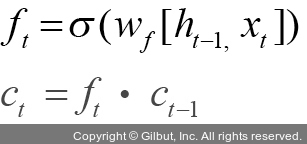

  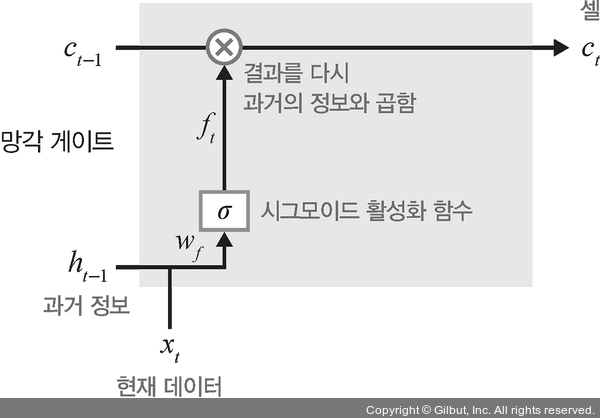

- 입력 게이트 (input gate)
  
  1. 현재 정보 기억
  2. 과거 정보, 현재 데이터 입력받아, sigmoid, tanh 함수를 각각 씌움
  3. 출력값이 1이면 입력 xt가 들어올 수 있도록 허용 (open)
  4. 출력값이 0이면 차단

  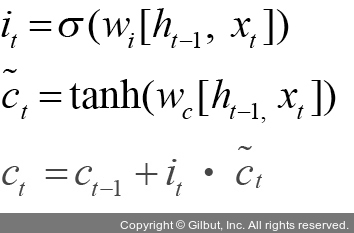

  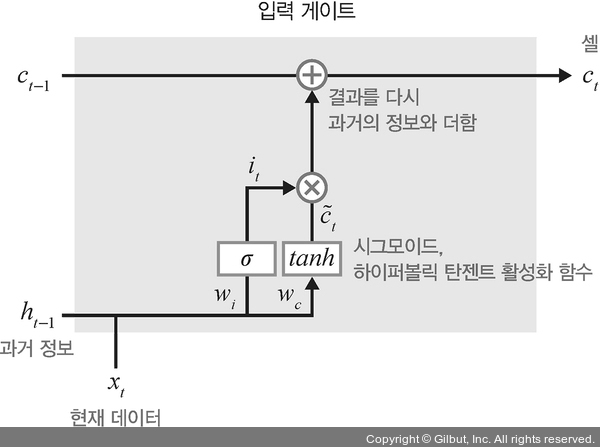

- 셀 (vanishing gradient 문제 해결)

  1. 각 단계에 대한 은닉 노드 = 메모리 셀
  2. 입력,망각 게이트의 출력 결과 값으로 기울기 소멸 문제 해결
  3. 출력 결과 값을 가지고 셀을 업데이트함

  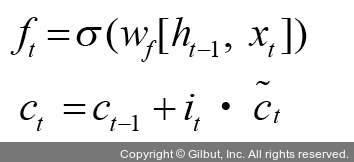

  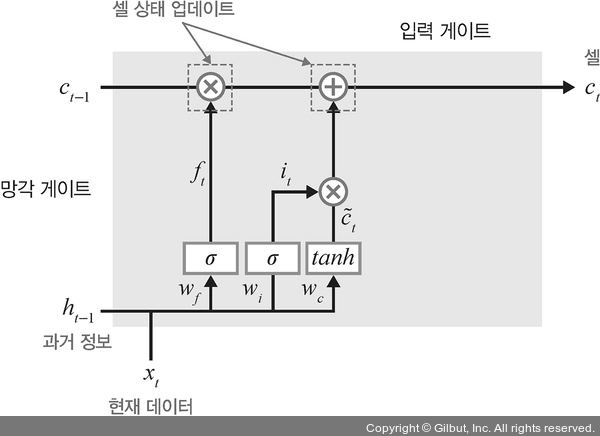

- 출력 게이트 (ouput gate)
  
  1. 과거 정보, 현재 데이터를 이용해 뉴런 출력을 결정
  2. 이전 은닉 상태, t번째 x입력을 고려해 다름 은닉 상태 계산
  3. 은닉 상태 = LSTM에서 그 시점에서의 출력
  4. 갱신된 메모리의 출력 값을 제어하여, 1이면 의미 있는 결과로 출력, 0이면 해단 연산 출력 하지 않음

  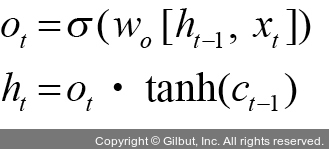

  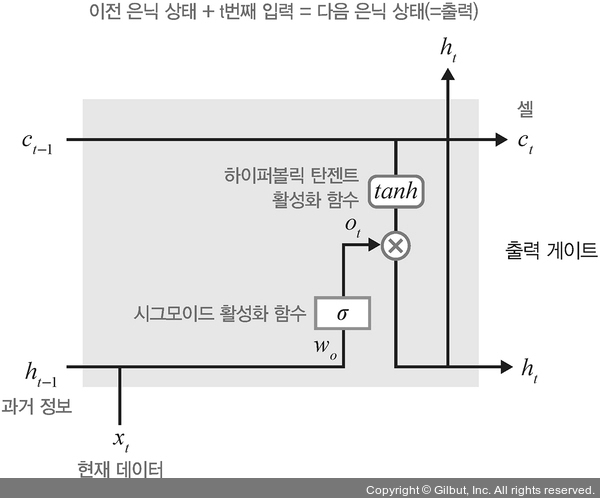

게이트 전체 구조 (forget, input, output)

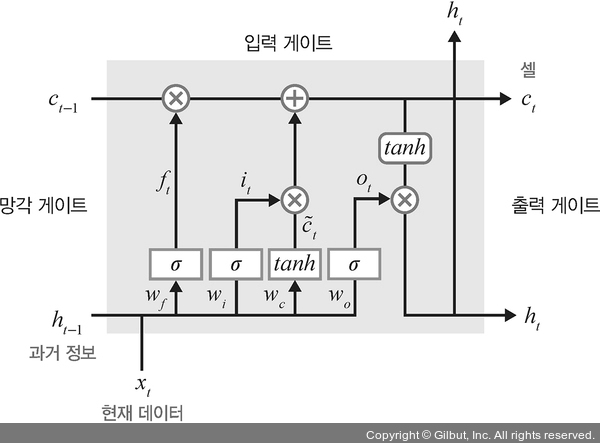

####LSTM 역전파

- 중단 없는 기울기 (uninterrupted gradient low)
  - 셀을 통하여 역전파를 수행하기 때문
  - 최종 오차가 모든 노드에 전파, 셀을 통해서 중단없이 전파됨

  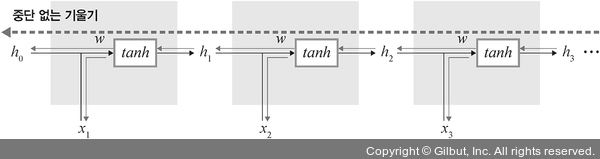

- 역전파 공식

  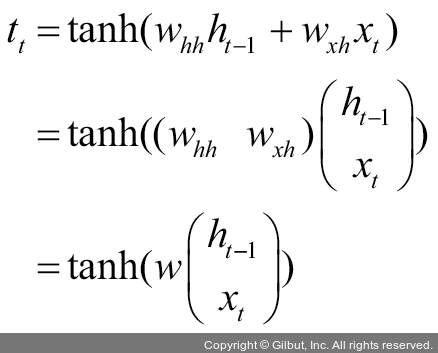

- 오차가 입력(xt)로 전파됨을 주의 (셀 내부적으로)

  - 셀 단위로 오차가 전파되지만
  - 입력 방향으로로 오차가 전파된다

  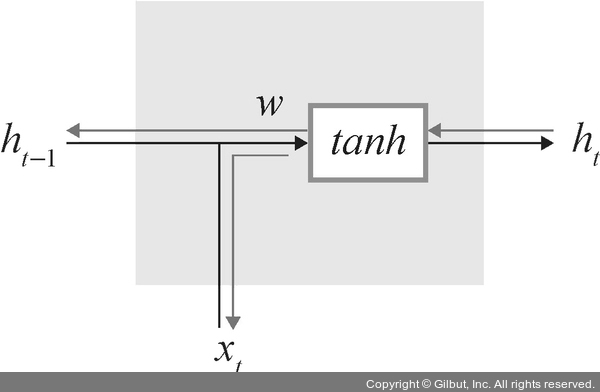

### LSTM 코드 구현 [Pytorch MNIST (전처리 이미 되어있는 데이터셋)]

####import

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
# 파라미터 목록을 갖고 있는 라이브러리(패키지)
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import math 
# 수학과 관련되어 다양한 함수들과 상수들이 정의되어 있는 라이브러리

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False 
# GPU 사용에 필요(GPU는 8장에서 자세히 살펴볼 예정이지만 미리 눈으로 익혀 두세요)

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor 
# GPU 사용에 필요

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

#### dataset

In [ ]:
# 데이터 전처리
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,)) 
    # 평균을 0.5, 표준편차를 1.0으로 데이터 정규화(데이터 분포를 조정)
])

In [ ]:
# 데이터셋 내려받기
from torchvision.datasets import MNIST

download_root = '../chap07/MNIST_DATASET'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True) 
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

In [ ]:
batch_size = 64
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size,
                          shuffle=True)
valid_loader = DataLoader(dataset=test_dataset,
                          batch_size=batch_size,
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size,
                         shuffle=True)

In [ ]:
batch_size = 100
n_iters = 6000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

#### LSTM 셀 네트워크 구축

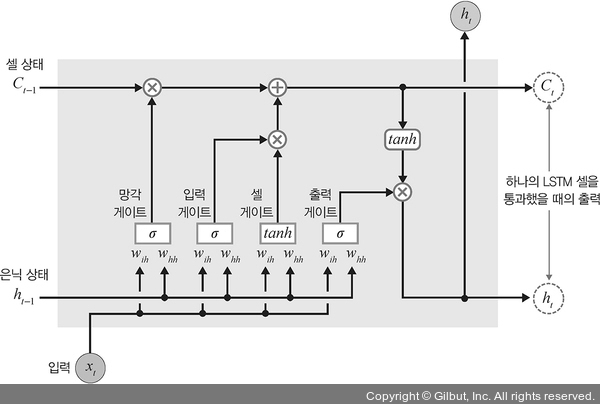

In [ ]:
class LSTMCell(nn.Module): 
  # LSTM 셀에 대한 더 자세한 설명을 원한다면 http://www.bioinf.jku.at/publications/older/2604.pdf 논문을 참고하세요.
    def __init__(self, input_size, hidden_size, bias=True):
        super(LSTMCell, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.bias = bias
        self.x2h = nn.Linear(input_size, 4 * hidden_size, bias=bias)
        self.h2h = nn.Linear(hidden_size, 4 * hidden_size, bias=bias) 
        # 4 * hidden_size 의 이유!
        #   그림에서 보다시피, 망각 / 입력 / 셀 / 출력 게이트가 존재
        #   모든 게이트식, gates = F.linear(input,w_ih,b_ih)+F.linear(hx,w_hh,b_hh)
        #     input : 입력층으로 입력되는 훈련 데이터셋 특성 수
        #     w_ih : 입력층 은닉층 사이의 가중치
        #     b_ih : 입력층 은닉층 사이의 바이어스
        #     hx : 은닉층 뉴런/유닛 수
        #     w_hh : 은닉층 은닉층 사이의 가중치
        #     b_hh : 은닉층 은닉층 사이의 바이어스

        self.reset_parameters()

    def reset_parameters(self): 
      # 모델의 파라미터 초기화
        std = 1.0 / math.sqrt(self.hidden_size)
        for w in self.parameters():
            w.data.uniform_(-std, std)
            # 난수 생성 예시      
            # from random import *
            # ri = randint(1, 10) ------ 1부터 10 사이의 임의의 정수
            # print(ri)
            # rd = random() ------ 0부터 1 사이의 임의의 실수(float)
            # print(rd)
            # ui = uniform(1, 10) ------ 1부터 10 사이의 임의의 실수(float)
            # print(ui)
            # rr = randrange(1, 10, 2) ------ 1부터 10 사이를 2씩 건너뛴 임의의 정수(예 1, 3, 5, 7, 9)
            # print(rr)

    def forward(self, x, hidden):
        hx, cx = hidden
        x = x.view(-1, x.size(1))

        gates = self.x2h(x) + self.h2h(hx) 
        gates = gates.squeeze() 
        # torch.squeeze() : 텐서의 차원을 줄이고자 할 때 사용
        # import torch
        # x = torch.FloatTensor([[1], [2]]) ------ (2×1) 크기의 2차원 텐서 생성
        # print(x)
        # print(x.shape)
        # print('--squeeze 적용--')
        # print(x.squeeze()) ------ squeeze( )가 적용되어 1차원으로 축소
        # print(x.squeeze().shape)

        ingate, forgetgate, cellgate, outgate = gates.chunk(4, 1) 
        # gates.chunk(4,1) 해석
        #   게이트가 4개로 쪼개져, 망각 / 입력 / 셀 / 출력을 의미하는 변수에 저장
        #   게이트가 쪼개지기 때문에 4 * hidden_size 의 이유! (은닉층의 뉴런/유닛 개수에 4배)
        #   4 -> 텐서를 몇개로 쪼갤지 성정
        #   1 -> 어떤 차원을 기준으로 쪼갤지 결정 (dim = 1 이므로 열 단위로 텐서 분할)

        ingate = F.sigmoid(ingate) 
        # 입력 게이트에 시그모이드 활성화 함수 적용
        forgetgate = F.sigmoid(forgetgate) 
        # 망각 게이트에 시그모이드 활성화 함수 적용
        cellgate = F.tanh(cellgate)
        # 셀 게이트에 탄젠트 활성화 함수 적용
        outgate = F.sigmoid(outgate) 
        # 출력 게이트에 시그모이드 활성화 함수 적용

        cy = torch.mul(cx, forgetgate) + torch.mul(ingate, cellgate) 
        hy = torch.mul(outgate, F.tanh(cy)) 
        # 하나의 LSTM 셀을 통과하면 -> ct(셀), ht(은닉 상태)가 하나씩 출력됨
        # 셀 상태 -> 입력,망각,셀 게이트에 의해 계산
        # 은닉 상태 -> 출력 게이트에 의해 계산
        # torch.mul() : 텐서 곱셈′

        # import torch
        # x = torch.FloatTensor([[1], [2]]) ------ 임의의 텐서 생성
        # print(x)
        # print('--mul 적용--')
        # torch.mul(x, 3) ------ x라는 텐서의 원소에 3을 곱합니다.
        return(hy, cy)

#### LSTM 전반적 네트워크 구축

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        # 은닉층의 뉴런/유닛 개수

        self.layer_dim = layer_dim
        self.lstm = LSTMCell(input_dim, hidden_dim, layer_dim)
        # (입력 특성 수, 은닉층 뉴런 수, 은닉층 계층 수)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        if torch.cuda.is_available(): 
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda()) ------(은닉층의 계층 개수, 배치 크기, 은닉층의 뉴런 개수) 형태를 갖는 은닉 상태를 0으로 초기화
        else:
            h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))

        if torch.cuda.is_available(): 
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).cuda()) ------ (은닉층의 계층 개수, 배치 크기, 은닉층의 뉴런 개수) 형태를 갖는 셀 상태를 0으로 초기화
        else:
            c0 = Variable(torch.zeros(self.layer_dim, x.size(0), hidden_dim))

        outs = []
        cn = c0[0,:,:] 
        # (은닉층의 계층 개수, 배치 크기, 은닉층의 뉴런 개수) 크기를 갖는 셀 상태에 대한 텐서
        hn = h0[0,:,:] 
        # (은닉층의 계층 개수, 배치 크기, 은닉층의 뉴런 개수) 크기를 갖는 은닉 상태에 대한 텐서

        for seq in range(x.size(1)): 
          # LSTM 셀 계층을 반복하여 쌓아 올립니다.
            hn, cn = self.lstm(x[:,seq,:], (hn,cn)) 
            # 은닉 상태(hn)와 셀 상태를 LSTMCell에 적용한 결과를 또다시 hn, cn에 저장
            outs.append(hn)

        out = outs[-1].squeeze()
        out = self.fc(out)
        return out

####Optimiser & Loss Function

In [ ]:
input_dim = 28
hidden_dim = 128
layer_dim = 1
output_dim = 10

model = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
if torch.cuda.is_available(): 
    model.cuda()
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

####학습 시작 & 결과 확인

In [ ]:
seq_dim = 28
loss_list = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader): 
        if torch.cuda.is_available(): 
            images = Variable(images.view(-1, seq_dim, input_dim).cuda()) 
            labels = Variable(labels.cuda())
        else: 
            images = Variable(images.view(-1, seq_dim, input_dim))
            labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels) 
        if torch.cuda.is_available():
            loss.cuda()

        loss.backward()
        optimizer.step() 
        loss_list.append(loss.item())
        iter += 1

        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in valid_loader: 

                if torch.cuda.is_available():
                    images = Variable(images.view(-1, seq_dim, input_dim).cuda())
                else:
                    images = Variable(images.view(-1, seq_dim, input_dim))

                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)

                total += labels.size(0) 
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct / total
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

In [ ]:
def evaluate(model, val_iter):
    corrects, total, total_loss = 0, 0, 0
    model.eval()
    for images, labels in val_iter:
        if torch.cuda.is_available():
            images = Variable(images.view(-1, seq_dim, input_dim).cuda())
        else:
            images = Variable(images.view(-1, seq_dim, input_dim)).to(device)

        logit = model(images).to(device)
        loss = F.cross_entropy(logit, labels, reduction="sum") 
        # reduction=‘sum’을 지정했기 때문에 모든 오차를 더합니다.
        _, predicted = torch.max(logit.data, 1) 
        # logit.data 텐서에서 최댓값의 인덱스(index)를 반환
        total += labels.size(0)
        total_loss += loss.item()
        corrects += (predicted == labels).sum()

    avg_loss = total_loss / len(val_iter.dataset)
    avg_accuracy = corrects / total
    return avg_loss, avg_accuracy

test_loss, test_acc = evaluate(model, test_loader)
print("Test Loss: %5.2f | Test Accuracy: %5.2f" % (test_loss, test_acc))

### LSTM 코드 구현 [Pytorch 스타벅스 (전처리 과정까지 포함)]

####import

In [ ]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

####Dataset

In [ ]:
data = pd.read_csv('../chap07/data/SBUX.csv')
# kaggle에 있음
print(data.dtypes)

In [ ]:
# 날짜 칼럼을 인덱스로 사용
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True) 
data['volume'] = data['volume'].astype(float)
# 데이터 형식을 변경할 때는 astype()을 사용
X = data.iloc[:, :-1] 
# 마지막 칼럼을 제외한 모든 칼럼을 x로 사용
y = data.iloc[:, 5:6] 
# 마지막 ‘Volume’을 레이블로 사용
print(X)
print(y)

In [ ]:
# 데이터 분포 조정
ms = MinMaxScaler() 
# 데이터의 모든 값이 0~1 사이에 존재하도록 분산 조정
ss = StandardScaler() 
# 데이터가 평균 0, 분산 1이 되도록 분산 조정

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

X_train = X_ss[:200, :] 
# 훈련 데이터셋
X_test = X_ss[200:, :] 
# 테스트 데이터셋

y_train = y_ms[:200, :]
y_test = y_ms[200:, :]

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

In [ ]:
# 데이터셋 형태 & 크기 조정
X_train_tensors = Variable(torch.Tensor(X_train)) 
# Variable로 감싸진 텐서는 .backward( )가 호출될 때 자동으로 기울기가 계산
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors, (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
# 텐서 형태를 (200,5) -> (200,1,5) 로 변경
X_test_tensors_f = torch.reshape(X_test_tensors, (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape)

#### LSTM 네트워크

In [ ]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes # 클래스 개수
        self.num_layers = num_layers # LSTM 계층의 개수
        self.input_size = input_size # 입력 크기로 훈련 데이터셋의 칼럼 개수를 의미
        self.hidden_size = hidden_size # 은닉층의 뉴런 개수
        self.seq_length = seq_length # 시퀀스 길이

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True) # LSTM 계층
        self.fc_1 = nn.Linear(hidden_size, 128) # 완전연결층
        self.fc = nn.Linear(128, num_classes) # 출력층
        self.relu = nn.ReLU()

    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) # 은닉 상태를 0으로 초기화
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) # 셀 상태를 0으로 초기화
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) # LSTM 계층에 은닉 상태와 셀 상태 적용
        hn = hn.view(-1, self.hidden_size) # 완전연결층 적용을 위해 데이터의 형태 조정(1차원으로 조정)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

#### 변수 값 설정

In [ ]:
num_epochs = 1000 
learning_rate = 0.0001 

input_size = 5 
hidden_size = 2 
num_layers = 1 

num_classes = 1 
model = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1]) 

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#### 학습 시작

In [ ]:
for epoch in range(num_epochs): 
    outputs = model.forward(X_train_tensors_f) 
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors)
    loss.backward() 

    optimizer.step() 
    if epoch % 100 == 0: 
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

#### 결과 출력 & 데이터 크기 재구성

In [ ]:
df_x_ss = ss.transform(data.iloc[:, :-1]) # 데이터 정규화(분포 조정)
df_y_ms = ms.transform(data.iloc[:, -1:]) # 데이터 정규화

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

In [ ]:
train_predict = model(df_x_ss) # 훈련 데이터셋을 모델에 적용하여 모델 학습
predicted = train_predict.data.numpy() # 모델 학습 결과를 넘파이로 변경
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted) # 모델 학습을 위해 전처리(정규화)했던 것을 해제(그래프의 본래 값을 출력하기 위한 목적)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6)) # 그래프로 표시(plotting)
plt.axvline(x=200, c='r', linestyle='--') 
# 그래프 수직선 표현 

plt.plot(label_y, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()

## GRU (게이트 순환 신경망)

Gated Recurrent Unit

게이트 메커니즘이 적용된 RNN 프레임워크

LSTM보다 구조가 간단하다

###GRU 구조

LSTM의 망각 게이트 + 입력 게이트를 합한 ㅡ> 게이트 컨트롤러

Gate controller (게이트 컨트롤러) : 망각 게이트 & 입력 게이트 모두 제어

- 1을 출력 : 망각 게이트 open, 입력 게이트 close
- 0을 출력 : 망각 게이트 closw, 입력 게이트 open
- 이전 기억이 저장될 때마다 단계별 입력은 삭제

이전 상태의 어느 부분이 출력될지 제어하는 새로운 게이트 컨트롤러 필요 (출력 게이트가 없어 전체 상태 벡터가 매 단계마다 출력되기 때문에)


- 망각 게이트 (reset gate)
  
  - 과거 정보를 적당히 초기화(reset) 시키려는 목적

  - 수식

    sigmoid(이전 시점의 은닉층 값 * 현시점의 정보에 대한 가중치)

    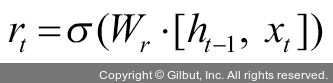

    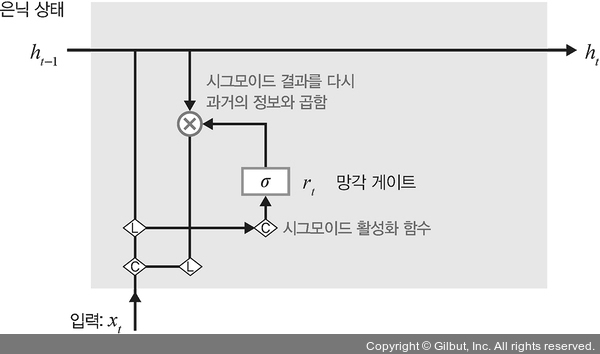

- 업데이트 게이트 (Update gate)

  - 과거와 현재 정보의 최신화 비율 결정

  - 수식
  
    현시점의 정보량 = zt

    (1-zt) * 직전 시점의 은닉층 정보

    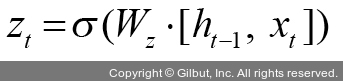

    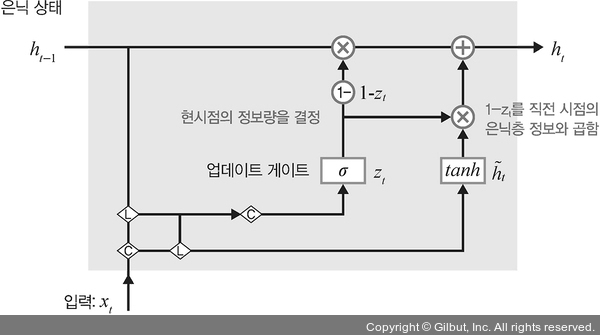


- 후보군 (candidate)

  - 현시점의 정보에 대한 후보군 계산

  - 망각 게이트 결과로 후보군 계산

  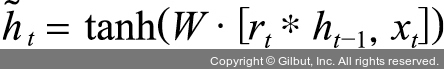

  - '*'는 점 단위 연산 : 벡터끼리 각각의 차원에 맞게 곱/덧셈 가능

- 은닉층 계산

  - 업데이트 게이트 결과 + 후보군 결과를 결합 ㅡ> 현시점 은닉층 계산

  - zt의 결과는 현시점에서 결과에 대한 정보량 결정

  - 1-zt의 결과는 과거의 정보량 결정

  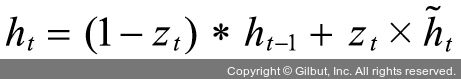

GRU 전체 구조

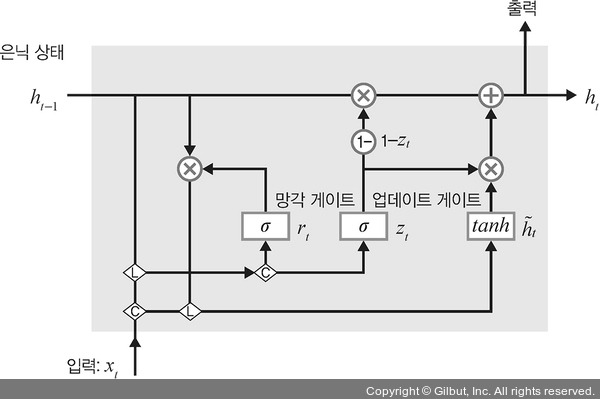

## 양방향 RNN (bidirectional RNN) (RNN/LSTM/GRU 모두에 적용)

- 과거 시점 + 미래 시점의 데이터를 활용하여, 출력 값을 예측하느 양방향 RNN

### bidirectional RNN 구조

- 출력 값 하나에, 메모리 셀 두개 사용

  - 첫번째 메모리 셀 : 이전시점의 은닉 상태로 현재 은닉 상태 계산

  - 두번째 메모리 셀 : 다음시점의 은닉 상태로 현재 은닉 상태 계산

- 양방향 RNN의 개념은 RNN / LSTM / GRU 모두에 적용

### 양방향 LSTM 코드 구현

#### import & dataset

In [ ]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

data = pd.read_csv('/content/drive/MyDrive/SBUX.csv')
print(data.dtypes)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Volume'] = data['Volume'].astype(float)

X = data.iloc[:, :-1]
y = data.iloc[:, 5:6]

ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

X_train = X_ss[:200, :]
X_test = X_ss[200:, :]
y_train = y_ms[:200, :]
y_test = y_ms[200:, :]

X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors, (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors, (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape)

#### 모델 네트워크

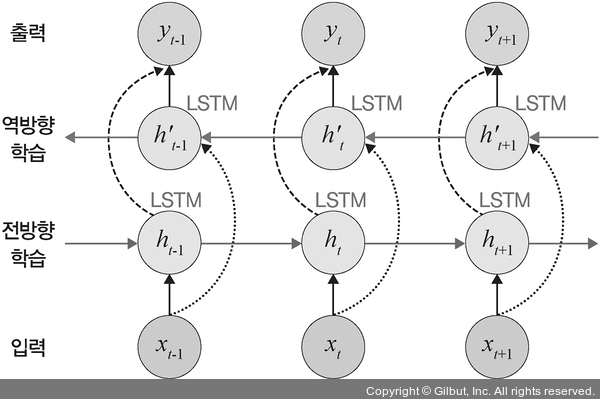

In [ ]:
class biLSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size):
        super(biLSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, bidirectional=True, batch_first=True)
        # bidirectional=True 로 양방향 LSTM 사용하겠다는 의미
        # 양방향 RNN/GRU 모두에 해당
        self.fc = nn.Linear(hidden_size*2, num_classes)
        # 입력 데이터가 전방향 + 역방향 학습에 모두 전달, 결과도 출력에 모두 반영
        # 학습에 두 개의 계츠이 필요 ㅡ> 은닉 상태, 셀 상태에 2를 곱, 출력층에도 2를 곱
        self.relu = nn.ReLU()

    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size))
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :]) # 마지막 시간(time step상 마지막 단계)의 은닉 상태
        out = self.relu(out)
        return out

#### 학습 시작

In [ ]:
num_epochs = 10000
learning_rate = 0.0001

input_size = 5
hidden_size = 2
num_layers = 1
num_classes = 1
model = biLSTM(num_classes, input_size, X_train_tensors_f.shape[1])

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f)
    optimizer.zero_grad()
    
    loss = criterion(outputs, y_train_tensors)
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

#### 평가

In [ ]:
df_x_ss = ss.transform(data.iloc[:, :-1])
df_y_ms = ms.transform(data.iloc[:, -1:])

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()
label_y = df_y_ms.data.numpy()

predicted = ms.inverse_transform(predicted)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6))
plt.axvline(x=200, c='r', linestyle='--')

plt.plot(label_y, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()